<a href="https://colab.research.google.com/github/mehdimt1980/Text-Clustering/blob/main/Text_Clustering_on_Hobbes's_Leviathan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

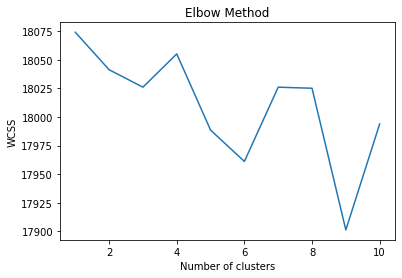

Top words per cluster:
Cluster 0 words: commonwealth:0.25 soveraign:0.01 christian commonwealth:0.01 authority:0.01 power:0.01 authority commonwealth:0.01 man:0.01 power commonwealth:0.01 person:0.01 christian:0.01
Cluster 1 words: kingdome:0.24 kingdome god:0.10 god:0.07 come:0.02 christ:0.02 kingdome christ:0.01 kingdome heaven:0.01 father:0.01 heaven:0.01 shall:0.01
Cluster 2 words: man:0.01 power:0.01 law:0.01 soveraign:0.00 shall:0.00 nature:0.00 say:0.00 time:0.00 hath:0.00 right:0.00
Cluster 3 words: christian:0.12 names:0.08 second:0.06 christian faith:0.01 christian kings:0.01 faith:0.01 death:0.01 kings:0.01 men:0.01 christian men:0.01
Cluster 4 words: god:0.09 men:0.09 man:0.01 hath:0.01 word god:0.01 god hath:0.01 word:0.01 onely:0.01 spirit:0.01 moses:0.01


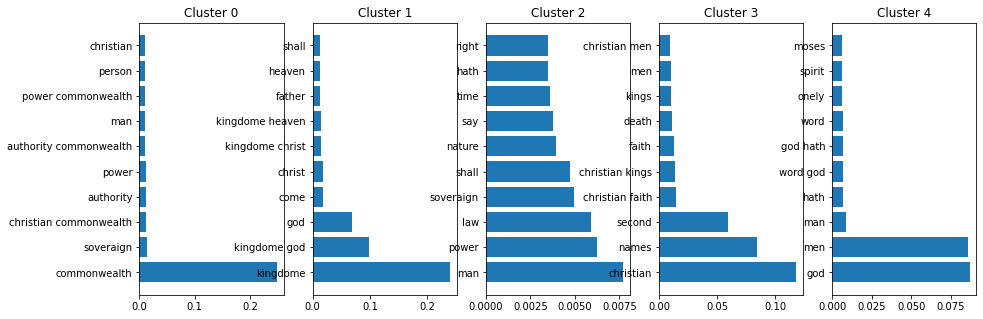

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Load the text data
with open('/content/leviathan.txt', 'r') as f:
    text = f.readlines()

# Convert text to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
X = vectorizer.fit_transform(text)

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, 
                    random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Cluster the data using KMeans
num_clusters = 5 # choose the number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, 
                n_init=10, random_state=0)
kmeans.fit(X)
pred_y = kmeans.predict(X)

# Get the top words for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
top_words = []
for i in range(num_clusters):
    cluster_words = []
    for ind in order_centroids[i, :10]:
        cluster_words.append((terms[ind], kmeans.cluster_centers_[i, ind]))
    top_words.append(cluster_words)

# Print the top words for each cluster
print("Top words per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(num_clusters):
    print(f"Cluster {i} words:", end='')
    for j in order_centroids[i, :10]:
        print(f" {terms[j]}:{kmeans.cluster_centers_[i, j]:.2f}", end='')
    print()

# Visualize the results
fig, axs = plt.subplots(1, num_clusters, figsize=(15,5))
for i in range(num_clusters):
    cluster_words = top_words[i]
    words = [x[0] for x in cluster_words]
    values = [x[1] for x in cluster_words]
    axs[i].barh(words, values)
    axs[i].set_title(f'Cluster {i}')
plt.show()